In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import os

In [4]:
train_dir= r'C:\Users\banty_ewxe1fw\Desktop\deep learning videos internshala\Data set, Presentation and Python Notebook for Image recognition project module\Dataset\train'
validation_dir=r'C:\Users\banty_ewxe1fw\Desktop\deep learning videos internshala\Data set, Presentation and Python Notebook for Image recognition project module\Dataset\validation'
test_dir= r'C:\Users\banty_ewxe1fw\Desktop\deep learning videos internshala\Data set, Presentation and Python Notebook for Image recognition project module\Dataset\test'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode="binary")
validation_generator=test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
from tensorflow.keras.applications import VGG16

In [8]:
conv_base=VGG16(weights='imagenet',
               include_top=False,
               input_shape=(150,150,3))

In [9]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers 

model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [13]:
conv_base.trainable=(False)

In [14]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=2e-5),
             metrics=['acc'])

C:\Users\banty_ewxe1fw\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
#checkpoint_cb=keras.callbacks.ModelCheckpoint('CNN_Project_Model-{epochs:02d}.h5')

In [15]:
history=model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 306s 3s/step - loss: 0.5927 - acc: 0.7060 - val_loss: 0.4454 - val_acc: 0.8370
Epoch 2/30
100/100 [==============================] - 310s 3s/step - loss: 0.4759 - acc: 0.7885 - val_loss: 0.3660 - val_acc: 0.8630
Epoch 3/30
100/100 [==============================] - 311s 3s/step - loss: 0.4241 - acc: 0.8180 - val_loss: 0.3349 - val_acc: 0.8720
Epoch 4/30
100/100 [==============================] - 310s 3s/step - loss: 0.4079 - acc: 0.8250 - val_loss: 0.3170 - val_acc: 0.8600
Epoch 5/30
100/100 [==============================] - 315s 3s/step - loss: 0.3882 - acc: 0.8270 - val_loss: 0.2974 - val_acc: 0.8770
Epoch 6/30
100/100 [==============================] - 315s 3s/step - loss: 0.3732 - acc: 0.8380 - val_loss: 0.2885 - val_acc: 0.8840
Epoch 7/30
100/100 [==============================] - 310s 3s/step - loss: 0.3557 - acc: 0.8460 - val_loss: 0.2758 - val_acc: 0.8920
Epoch 8/30
100/100 [==============================] - 311s 3s/step - 

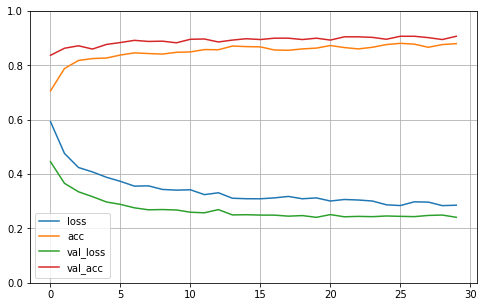

In [16]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [17]:
hist_df=pd.DataFrame(history.history)

In [18]:
hist_csv_file='history.csv'
with open(hist_csv_file,mode='w') as f;
hist_df.to_csv(f)

SyntaxError: invalid syntax (2347350839.py, line 2)

In [ ]:
test_generator= test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

In [ ]:
model.evaluate_generator(test_generator,steps=50)